参考实验楼机器学习赛，多项式回归及应用https://www.shiyanlou.com/contests/lou22/challenges#challenges

多项式（Polynomial）是代数学中的基础概念，是由称为未知数的变量和称为系数的常量通过有限次加法、加减法、乘法以及自然数幂次的乘方运算得到的代数表达式。多项式回归，直观意义上就是通过一条由多项式生成的曲线去拟合样本，最终得到该多项式各项的系数。多项式回归是数据拟合的一种统计模型，也是一种非线性回归，由于任一函数都可以用多项式逼近，因此多项式回归有着广泛应用。

挑战提供了一组训练样本 (x, y)，需使用如下所示的一元三次多项式进行回归拟合。   
   $y(x,w) = w_0+w_1x+w_2x^2+w_3x^3$    
训练数据获得：wget -nc http://labfile.oss.aliyuncs.com/courses/1263/lousai-22-01.csv  
目标  
使用残差函数作为损失函数，并使用最小二乘法求解多项式回归最优拟合系数。  
这里使用TensorFlow实现

 

## 分析建模
我们知道线性回归模型是最简单的模型， 有不少假设前提，其中最重要的一条就是响应变量和解释变量之间的确存在着线性关系，否则建立线性模型就没什么意义。然而现实中的数据往往线性关系比较弱，甚至本来就不存在着线性关系，比如我们预测某个时刻某辆公交的乘客数，分析房价模型、还有畜禽、水产以及工业传感实际领域，这些都是非线性模型，而多项式回归就是一个常用的非线性模型。
    上述问题 ：  $y(x,w) = w_0+w_1x+w_2x^2+w_3x^3$   
可以令 $x_1=x,x_2=x^2,x_3=x^3 $  
则可以转为多元线性方程拟合，从而减少公式复杂度。
当然这里是三次，可以当做以下一元高阶的j=3时的特例，
    假设存在一个函数，只有一个自变量，即只有一个特征属性，满足多项式函数如下：  
$f_M(x,w) = w_0+w_1x+w_2x^2+...+w_Mx^M = \displaystyle \sum^{M}_{y = 0}{w_jx^j}$  
损失函数：损失函数越小，就代表模型拟合的越好。  
$L(w) = \frac{1}{2} \displaystyle \sum^{N}_{i = 1}(\sum^{M}_{j=0}{w_j{x}^j_i}-y_i)^2$  
通过对损失函数偏导为0时，得到最终解方程的函数：  
 
 
   \begin{bmatrix}
    &N &\sum{x_i} &\sum{x}^2_i &... &\sum{x}^M_i \\ 
    &\sum{x}_i &\sum{x}^2_i &\sum{x}^3_i &... &\sum{x}^{M+1}_i  \\ 
    &\sum{x}^2_i &\sum{x_i} &\sum{x}^2_i &... &\sum{x}^{M+2}_i  \\ 
    &...  &...  &...  &\ddots &...\\ 
    &\sum{x}^{M}_i  &\sum{x}^{M+1}_i  &\sum{x}^{M+2}_i &... &\sum{x}^{2M}_i 
   \end{bmatrix}   

   \begin{pmatrix}
   w_0 
   \\w_1
   \\w_2 
   \\...
   \\w_m
   \end{pmatrix}

   = \begin{bmatrix}
   \sum{y}_i\\
   \sum{x_i}{y_i}\\
   \sum{{x}_i^2}{y_i}\\
   ...\\
  \sum{{x}_i^M}{y_i}\\
  \end{bmatrix}


![image.png](image/CodeCogsEqn.gif)  

则可以直接代入方程求解。
当然解决方法还有很多。这里用的是最小二乘法。  
公式推导参考：   
https://www.zhihu.com/question/23483726  
http://blog.csdn.net/xiaolewennofollow/article/details/46757657  
https://wenku.baidu.com/view/f20f3e0da8956bec0875e343.html?from=search  

##  数据输入统计

<class 'pandas.core.frame.DataFrame'>
(88, 2)
          x         y
0  0.042381  0.061118
1  0.038213  0.058461
2  0.038502  0.067291
3  0.041743  0.076115
4  0.041582  0.086384
5  0.044328  0.089002
6  0.048092  0.098022
7  0.043647  0.105680
8  0.043319  0.111334
9  0.051129  0.122508
               x          y
count  88.000000  88.000000
mean    0.260638   0.281116
std     0.154888   0.117426
min     0.038213   0.058461
25%     0.095993   0.241940
50%     0.269132   0.253810
75%     0.412428   0.352693
max     0.466618   0.496245


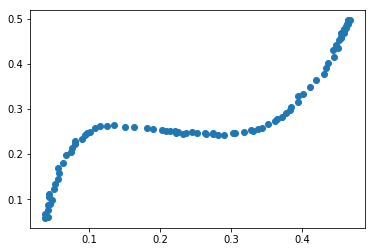

In [2]:
 # coding: utf-8sssssssss
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
#读入数据到数据框
data = pd.read_csv('data/lousai-22-01.csv')
#获取数据类型
print(type(data))
#查看行列数
print(data.shape)
#查看前10行数据
print(data.head(10))

#iloc取数据某行列， reshape：即形状重置，reshape(-1,1)表示所有的行数，全部整理成只有一列的样式；
datasets_X = data.iloc[:,0].values.reshape(-1,1) #取第一列转为数组
datasets_Y = data.iloc[:,1].values.reshape(-1,1)

#画散点图
plt.plot(datasets_X, datasets_Y, 'o')

#统计
print(data.describe())

## TensorFlow

Epoch0:0.0054826044096526775
Epoch100:0.00033832084687723807
Epoch200:0.0002454001867977305
Epoch300:0.000221279134882016
Epoch400:0.00020045348310113428
Epoch500:0.0001818947061746093
Epoch600:0.00016535811127846048
Epoch700:0.00015062422520202695
Epoch800:0.00013749663810124315
Epoch900:0.00012580016147626836
Epoch1000:0.0001153787770813834
Epoch1100:0.00010609380439535239
Epoch1200:9.782125798927182e-05
Epoch1300:9.045035131967487e-05
Epoch1400:8.388286839324596e-05
Epoch1500:7.803114997117045e-05
Epoch1600:7.281733552327358e-05
Epoch1700:6.817127623277536e-05
Epoch1800:6.403163482713506e-05
Epoch1900:6.0343085133656704e-05
Epoch2000:5.705637201101268e-05
Epoch2100:5.412791377374469e-05
Epoch2200:5.151849657172101e-05
Epoch2300:4.9193087770223315e-05
Epoch2400:4.712067680201493e-05
Epoch2500:4.527338001698224e-05
Epoch2600:4.3627486753355423e-05
Epoch2700:4.216061347358827e-05
Epoch2800:4.0853222201355585e-05
Epoch2900:3.968759154297659e-05
Epoch3000:3.864856371738057e-05
Epoch3100:

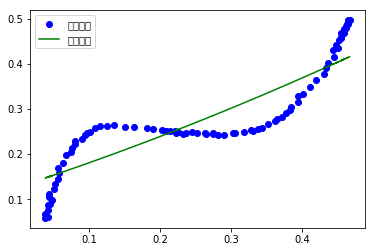

(array([0.12702082], dtype=float32), array([0.5134738], dtype=float32), array([0.23478429], dtype=float32), array([-0.02157618], dtype=float32))


In [19]:
# coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

def poly(file):
    data = pd.read_csv(file)
    datasets_X = data.iloc[:,0].values#.reshape(-1,1)
    datasets_Y = data.iloc[:,1].values#.reshape(-1,1)
    #n_observations = 100
    #xs = np.linspace(datasets_X.min(), datasets_X.max(), n_observations)
    #plt.plot(datasets_X, datasets_Y, 'o')
    
    #准备好placeholder
    X = tf.placeholder(tf.float32, name='X')
    Y = tf.placeholder(tf.float32, name='Y')
    
    #return linreg.intercept_[0] ,linreg.coef_[0][0],linreg.coef_[0][1],linreg.coef_[0][2]
    #初始化参数/权重
    W0 = tf.Variable(tf.random_normal([1]),name = 'weight0')  #从服从指定正太分布的数值中取出指定个数的值
    W1 = tf.Variable(tf.random_normal([1]),name = 'weight1')
    W2 = tf.Variable(tf.random_normal([1]),name = 'weight2')
    W3 = tf.Variable(tf.random_normal([1]),name = 'weight3')
    
    #计算预测值
    #Y_pred = X**3*W3 + X**2*W2 + X*W1 + W0
    #Y_pred =  tf.multiply(X,W1)+tf.multiply(tf.pow(X,2),W2)+tf.multiply(tf.pow(X,3),W3)+W0
        
    Y_pred = tf.add(tf.multiply(X,W1),W0)
    Y_pred = tf.add(tf.multiply(tf.pow(X,2),W2),Y_pred)
    Y_pred = tf.add(tf.multiply(tf.pow(X,3),W3),Y_pred)
     
    #计算损失值
    loss = tf.reduce_sum(tf.pow(Y_pred - Y,2))  / len(datasets_X) 
    
    
    #初始化optimizer
    learning_rate = 0.01
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    
    #初始化变量
    init = tf.global_variables_initializer()
    n_sample = len(datasets_X)            
    
    #会话
    
    with tf.Session() as sess:
        sess.run(init)
        #将搜集的变量写入事件文件，提供给Tensorboard使用
        writer = tf.summary.FileWriter('./image/polynomial_reg',sess.graph)
        #训练
        for i in range(5000):
            total_loss = 0  ##设定总共的损失初始值为0
            for x, y in zip(datasets_X, datasets_Y):   #将两个列表的对应分别取出一个，组成一个元组
                __, l = sess.run([train, loss], feed_dict={X: x, Y: y})
                total_loss += l  #计算所有的损失值进行叠加
            if i % 100 == 0:
                print('Epoch{0}:{1}'.format(i, total_loss/n_sample))
        
        # 关闭writer
        writer.close()
        W_0,W_1,W_2,W_3 =  sess.run([W0,W1,W2,W3])
    
      
    ##绘图
    plt.plot(datasets_X, datasets_Y, 'bo', label='样本数据')    #真实值的散点
     #预测值的拟合线条
    plt.plot(datasets_X,  np.power(datasets_X,3)*W_3 + np.power(datasets_X,2)*W_2 + datasets_X*W_1 + W_0, color='green',label="拟合直线" )
    plt.legend()     #用于显示图例
    plt.show() #显示图 

    return W_0,W_1,W_2,W_3
    
    
print(poly("data/lousai-22-01.csv"))

## sklearn


(-0.05546024314725534, 4.601034589525926, -20.53686905045881, 28.41324941863481)


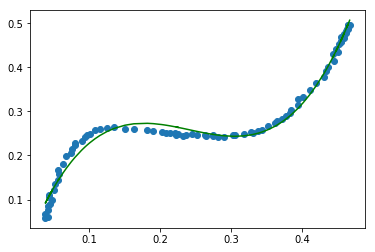

In [16]:
# coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def poly(file):
    #data = pd.read_csv('lousai-22-01.csv')
    data = pd.read_csv(file)
    datasets_X = data.iloc[:,0].values.reshape(-1,1)
    datasets_Y = data.iloc[:,1].values.reshape(-1,1)
     
     
    x_poly = PolynomialFeatures(degree=3,include_bias=False).fit_transform(datasets_X)
    linreg = LinearRegression()
    linreg.fit(x_poly,datasets_Y)
    plt.plot(datasets_X, datasets_Y, 'o')
    W_0,W_1,W_2,W_3 =  linreg.intercept_[0] ,linreg.coef_[0][0],linreg.coef_[0][1],linreg.coef_[0][2]
    
    plt.plot(datasets_X,  np.power(datasets_X,3)*W_3 + np.power(datasets_X,2)*W_2 + datasets_X*W_1 + W_0, color='green',label="拟合直线" )
    return linreg.intercept_[0] ,linreg.coef_[0][0],linreg.coef_[0][1],linreg.coef_[0][2]

print(poly("data/lousai-22-01.csv"))